In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from pandas.plotting import lag_plot
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


## World Bank: GDP from 1981-2022

We want to use GDP data from World Bank between 1981 and 2022 to predict data for 2023, 2024 and 2025.


We will first check what is the best method to do that, so We are taking the world GDP data to try out different models.

We are using Time Series statistical models (AR and ARIMA), as well as traditional ML models of Regression.

In [4]:
wb_gdp = pd.read_csv(r'C:\Users\menno\IH-Labs\IH-final-project\01_CSV files\wb_gdp_clean.csv')
wb_gdp

,WLD_gdp_per_capita_constant_us$,WLD_gdp_per_capita_%_growth,WLD_gdp_%_growth,ARG_gdp_per_capita_constant_us$,ARG_gdp_per_capita_%_growth,ARG_gdp_%_growth,AUS_gdp_per_capita_constant_us$,AUS_gdp_per_capita_%_growth,AUS_gdp_%_growth,BRA_gdp_per_capita_constant_us$,...,TUR_gdp_per_capita_constant_us$,TUR_gdp_per_capita_%_growth,TUR_gdp_%_growth,GBR_gdp_per_capita_constant_us$,GBR_gdp_per_capita_%_growth,GBR_gdp_%_growth,USA_gdp_per_capita_constant_us$,USA_gdp_per_capita_%_growth,USA_gdp_%_growth,time
0,3694.968086,2.406823,3.790081,7687.517338,3.740903,5.427843,20040.52311,0.463671,2.482656,2717.001315,...,2468.308533,-1.507613,1.156069,15198.15342,1.899262,2.677119,19253.54733,0.618121,2.300000,YR1961
1,3823.614985,3.481678,5.314851,7498.840061,-2.454333,-0.852022,19810.51808,-1.147700,1.294611,2811.627110,...,2535.943615,2.740139,5.571429,15235.92370,0.248519,1.102910,20116.23512,4.480669,6.100000,YR1962
2,3937.998747,2.991508,5.184483,6986.564802,-6.831393,-5.308197,20642.25997,4.198486,6.216107,2746.513434,...,2692.213168,6.162186,9.066306,15859.44911,4.092469,4.874384,20701.26995,2.908272,4.400000,YR1963
3,4109.998137,4.367685,6.557806,7572.231166,8.382751,10.130298,21653.97784,4.901197,6.980061,2758.862972,...,2766.383072,2.754979,5.459057,16628.57608,4.849645,5.533659,21599.81871,4.340549,5.800000,YR1964
4,4249.735255,3.399931,5.549061,8241.529337,8.838850,10.569433,22503.62361,3.923740,5.980438,2746.257726,...,2775.433757,0.327167,2.823530,16876.01736,1.488048,2.142177,22696.67858,5.078098,6.400000,YR1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,10777.870450,2.161637,3.288050,13105.397160,-3.601610,-2.617396,58479.50355,1.348283,2.883045,8553.864918,...,11938.745440,2.085158,2.979885,47006.14293,1.090624,1.705021,59607.39366,2.404868,2.945385,YR2018
58,10941.964490,1.522509,2.594550,12716.224200,-2.969562,-2.000861,58868.48063,0.665151,2.171396,8592.210218,...,11935.387870,-0.028123,0.783610,47491.59456,1.032741,1.604309,60698.01130,1.829668,2.294439,YR2019
59,10499.647110,-4.042395,-3.072225,11341.268370,-10.812611,-9.943235,58115.93067,-1.278358,-0.050885,8255.567064,...,12072.399440,1.147944,1.940032,42098.60293,-11.355676,-11.030858,58451.60672,-3.700953,-2.767803,YR2020
60,11037.294040,5.120619,6.023813,12402.490790,9.357176,10.398249,59339.68435,2.105711,2.236212,8621.730590,...,13341.556340,10.512880,11.353496,45334.15700,7.685657,7.597471,61829.84563,5.779548,5.945485,YR2021


## Time Series Statistical Model

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

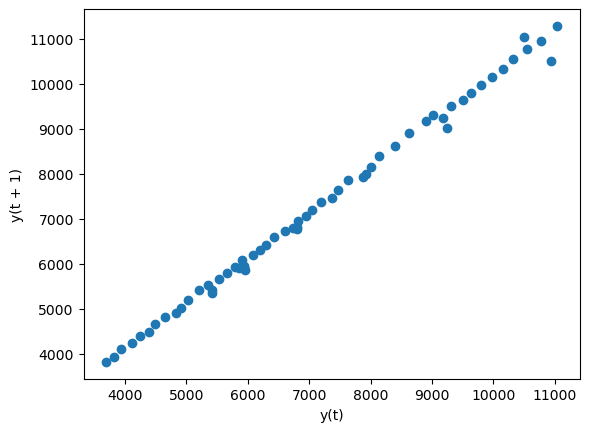

In [5]:
lag_plot(wb_gdp['WLD_gdp_per_capita_constant_us$'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

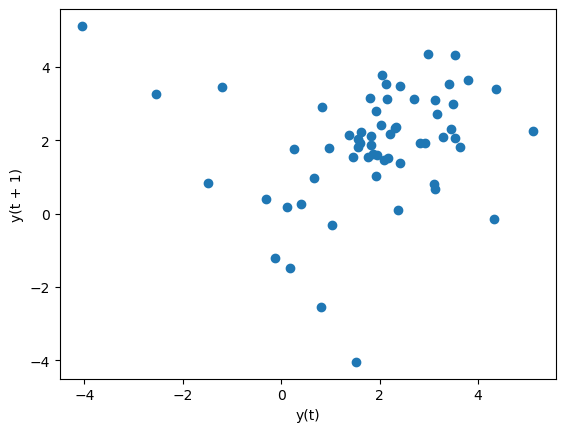

In [6]:
lag_plot(wb_gdp['WLD_gdp_per_capita_%_growth'])

The GDP per capita in dolars is a fairly good candidate for a time series, the GDP growth not so much
So as a starting point, we will model and analyse based only on WORLD data

### AR Model

In [7]:
train, test = wb_gdp['WLD_gdp_per_capita_constant_us$'][:-5], wb_gdp['WLD_gdp_per_capita_constant_us$'][-5:]
model_AR = AutoReg(train, lags=1)
model_fit_AR = model_AR.fit()

predictions_AR = model_fit_AR.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

observed = wb_gdp['WLD_gdp_per_capita_constant_us$'][-5:].to_list()
predicted_AR = predictions_AR.to_list()
            
forecast_errors = [observed[i]-predicted_AR[i] for i in range(len(observed))]
print('Forecast Errors: %s' % forecast_errors)

mse = mean_squared_error(observed, predicted_AR)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

Forecast Errors: [70.16394796358873, 74.88941458965019, -528.2942135672602, -153.02528098687253, -67.07477441460287]
RMSE: 252.008707


### ARIMA model

In [8]:
model_ARIMA = ARIMA(train, order=(1,1,1))
model_fit_ARIMA = model_ARIMA.fit()
predictions_ARIMA = model_fit_ARIMA.predict(len(wb_gdp['WLD_gdp_per_capita_constant_us$'])-3, len(wb_gdp['WLD_gdp_per_capita_constant_us$'])-1)


observed = wb_gdp['WLD_gdp_per_capita_constant_us$'][-3:].to_list()
predicted_ARIMA = predictions_ARIMA.to_list()
            

forecast_errors = [observed[i]-predicted_ARIMA[i] for i in range(len(observed))]
print('Forecast Errors: %s' % forecast_errors)

mse = mean_squared_error(observed, predicted_ARIMA)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

Forecast Errors: [-504.72967870199864, -117.85348548253751, -18.397480290215753]
RMSE: 299.432775


### Models accuracy comparison

In [9]:
pred_AR = pd.DataFrame({'year':wb_gdp['time'][-5:], 'observed':wb_gdp['WLD_gdp_per_capita_constant_us$'][-5:], 'predicted_AR':predicted_AR})
pred_AR['%_error_AR'] = ((pred_AR['observed']-pred_AR['predicted_AR'])/pred_AR['observed'])*100
pred_AR

,year,observed,predicted_AR,%_error_AR
57,YR2018,10777.87045,10707.706502,0.651000
58,YR2019,10941.96449,10867.075075,0.684424
59,YR2020,10499.64711,11027.941324,-5.031543
60,YR2021,11037.29404,11190.319321,-1.386438
61,YR2022,11287.14850,11354.223274,-0.594258


In [12]:
pred_ARIMA = pd.DataFrame({'year':wb_gdp['time'][-3:], 'observed':wb_gdp['WLD_gdp_per_capita_constant_us$'][-3:], 'predicted_ARIMA':predictions_ARIMA})
pred_ARIMA['%_error_ARIMA'] = ((pred_ARIMA['observed']-pred_ARIMA['predicted_ARIMA'])/pred_ARIMA['observed'])*100
pred_ARIMA

,year,observed,predicted_ARIMA,%_error_ARIMA
59,YR2020,10499.64711,11004.376789,-4.807111
60,YR2021,11037.29404,11155.147525,-1.067775
61,YR2022,11287.14850,11305.545980,-0.162995


The AR model had a low error but missed the 2020 GDP drop, likely due to the unforeseen pandemic shock. 

At first sight, the ARIMA model seems to work better than than the AR model. We could potentially optimize the paramaters, but we leave it for now.

## Regression Models

In this section We are using a series of past observations to predict the next observation.

In [50]:
### Create a dataset which takes a number of datapoints to predict the next one.

def window_input(window_length: int, data: pd.DataFrame):
    df = data.copy()
    df.columns = ['year','gdp']
    
    i = 1
    while i < window_length:
        df[f'x_{i}'] = df['gdp'].shift(-i)
        i = i + 1
        
    if i == window_length:
        df['y'] = df['gdp'].shift(-i)
        
    # Drop rows where there is a NaN
    df = df.dropna(axis=0)
        
    return df

In [51]:
len(wb_gdp)

62

In [52]:
gdp_seq = window_input(50, pd.DataFrame(wb_gdp[['time','WLD_gdp_per_capita_constant_us$']]))
gdp_seq

,year,gdp,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,y
0,YR1961,3694.968086,3823.614985,3937.998747,4109.998137,4249.735255,4399.611646,4489.980700,4660.303316,4829.812191,...,8001.098037,8145.033804,8402.121903,8629.561679,8899.215642,9174.687111,9249.207579,9013.614067,9309.046328,9503.641584
1,YR1962,3823.614985,3937.998747,4109.998137,4249.735255,4399.611646,4489.980700,4660.303316,4829.812191,4918.174789,...,8145.033804,8402.121903,8629.561679,8899.215642,9174.687111,9249.207579,9013.614067,9309.046328,9503.641584,9641.619886
2,YR1963,3937.998747,4109.998137,4249.735255,4399.611646,4489.980700,4660.303316,4829.812191,4918.174789,5022.723750,...,8402.121903,8629.561679,8899.215642,9174.687111,9249.207579,9013.614067,9309.046328,9503.641584,9641.619886,9791.488294
3,YR1964,4109.998137,4249.735255,4399.611646,4489.980700,4660.303316,4829.812191,4918.174789,5022.723750,5200.354454,...,8629.561679,8899.215642,9174.687111,9249.207579,9013.614067,9309.046328,9503.641584,9641.619886,9791.488294,9970.739832
4,YR1965,4249.735255,4399.611646,4489.980700,4660.303316,4829.812191,4918.174789,5022.723750,5200.354454,5425.674826,...,8899.215642,9174.687111,9249.207579,9013.614067,9309.046328,9503.641584,9641.619886,9791.488294,9970.739832,10156.953460
5,YR1966,4399.611646,4489.980700,4660.303316,4829.812191,4918.174789,5022.723750,5200.354454,5425.674826,5418.304236,...,9174.687111,9249.207579,9013.614067,9309.046328,9503.641584,9641.619886,9791.488294,9970.739832,10156.953460,10321.136800
6,YR1967,4489.980700,4660.303316,4829.812191,4918.174789,5022.723750,5200.354454,5425.674826,5418.304236,5353.415779,...,9249.207579,9013.614067,9309.046328,9503.641584,9641.619886,9791.488294,9970.739832,10156.953460,10321.136800,10549.821660
7,YR1968,4660.303316,4829.812191,4918.174789,5022.723750,5200.354454,5425.674826,5418.304236,5353.415779,5537.953873,...,9013.614067,9309.046328,9503.641584,9641.619886,9791.488294,9970.739832,10156.953460,10321.136800,10549.821660,10777.870450
8,YR1969,4829.812191,4918.174789,5022.723750,5200.354454,5425.674826,5418.304236,5353.415779,5537.953873,5665.546384,...,9309.046328,9503.641584,9641.619886,9791.488294,9970.739832,10156.953460,10321.136800,10549.821660,10777.870450,10941.964490
9,YR1970,4918.174789,5022.723750,5200.354454,5425.674826,5418.304236,5353.415779,5537.953873,5665.546384,5798.178193,...,9503.641584,9641.619886,9791.488294,9970.739832,10156.953460,10321.136800,10549.821660,10777.870450,10941.964490,10499.647110


### X-Y split

In [53]:
X = gdp_seq.drop(['year','y'], axis=1)
y = gdp_seq['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

### Creating the models

We are using Mean absolute percentage error (MAPE) to compare accuracy

In [54]:
def mape_calculation(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [55]:
%%time
import warnings
warnings.filterwarnings('ignore')

model1 = DecisionTreeRegressor(random_state=42)

model2 = LinearRegression()

model3 = KNeighborsRegressor(n_neighbors=5)

model4= RandomForestRegressor(random_state = 42)

model5 = GradientBoostingRegressor(random_state=42)


model_pipeline = [model1, model2, model3, model4, model5]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN', 'Random Forest Regressor', 'Gradient Boost Regressor']
mape = {}

predictions = pd.DataFrame()
predictions['observed']= y_test

for model, model_name in zip(model_pipeline, model_names):
    model.fit(X_train, y_train)
    predictions[f'prediction_{model_name}'] = model.predict(X_test)
    predictions[f'%_error_{model_name}'] = ((predictions['observed']-predictions[f'prediction_{model_name}'])/predictions['observed'])*100

    mape_model = mape_calculation(predictions['observed'], predictions[f'prediction_{model_name}'])
    mape[model_name] = mape_model

print(mape)

{'Decision Tree Regressor': 2.75, 'Linear Regression': 2.42, 'KNN': 5.29, 'Random Forest Regressor': 3.49, 'Gradient Boost Regressor': 2.83}
CPU times: total: 125 ms
Wall time: 323 ms


## Comparing all models

In [56]:
predictions_regression = predictions.reset_index(drop=True)
predictions_regression

,observed,prediction_Decision Tree Regressor,%_error_Decision Tree Regressor,prediction_Linear Regression,%_error_Linear Regression,prediction_KNN,%_error_KNN,prediction_Random Forest Regressor,%_error_Random Forest Regressor,prediction_Gradient Boost Regressor,%_error_Gradient Boost Regressor
0,10941.96449,10777.87045,1.499676,10950.947339,-0.082095,10355.30444,5.361561,10598.142155,3.142236,10748.992888,1.763592
1,10499.64711,10777.87045,-2.649835,11123.682528,-5.943394,10355.30444,1.374738,10583.814212,-0.801618,10763.295388,-2.511020
2,11037.29404,10777.87045,2.350427,11288.648945,-2.277324,10355.30444,6.178957,10599.790349,3.963867,10765.220937,2.465034
3,11287.14850,10777.87045,4.512017,11442.239948,-1.374053,10355.30444,8.255797,10602.070837,6.069537,10768.002283,4.599445


In [57]:
predictions_timeseries_stats = pd.concat([pred_AR, pred_ARIMA], axis=1).reset_index(drop=True)
predictions_timeseries_stats = predictions_timeseries_stats[2:].reset_index(drop=True)
predictions_timeseries_stats

,year,observed,predicted_AR,%_error_AR,year,observed,predicted_ARIMA,%_error_ARIMA
0,YR2020,10499.64711,11027.941324,-5.031543,YR2020,10499.64711,11004.376789,-4.807111
1,YR2021,11037.29404,11190.319321,-1.386438,YR2021,11037.29404,11155.147525,-1.067775
2,YR2022,11287.14850,11354.223274,-0.594258,YR2022,11287.14850,11305.545980,-0.162995


In [58]:
mape

{'Decision Tree Regressor': 2.75,
 'Linear Regression': 2.42,
 'KNN': 5.29,
 'Random Forest Regressor': 3.49,
 'Gradient Boost Regressor': 2.83}

In [59]:
mape['AR'] = mape_calculation(pred_AR['observed'], pred_AR['predicted_AR'])
mape['pred_ARIMA']=mape_calculation(pred_ARIMA['observed'], pred_ARIMA['predicted_ARIMA'])

mape

{'Decision Tree Regressor': 2.75,
 'Linear Regression': 2.42,
 'KNN': 5.29,
 'Random Forest Regressor': 3.49,
 'Gradient Boost Regressor': 2.83,
 'AR': 1.67,
 'pred_ARIMA': 2.01}

In [60]:
X

,gdp,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49
0,3694.968086,3823.614985,3937.998747,4109.998137,4249.735255,4399.611646,4489.980700,4660.303316,4829.812191,4918.174789,...,7923.580841,8001.098037,8145.033804,8402.121903,8629.561679,8899.215642,9174.687111,9249.207579,9013.614067,9309.046328
1,3823.614985,3937.998747,4109.998137,4249.735255,4399.611646,4489.980700,4660.303316,4829.812191,4918.174789,5022.723750,...,8001.098037,8145.033804,8402.121903,8629.561679,8899.215642,9174.687111,9249.207579,9013.614067,9309.046328,9503.641584
2,3937.998747,4109.998137,4249.735255,4399.611646,4489.980700,4660.303316,4829.812191,4918.174789,5022.723750,5200.354454,...,8145.033804,8402.121903,8629.561679,8899.215642,9174.687111,9249.207579,9013.614067,9309.046328,9503.641584,9641.619886
3,4109.998137,4249.735255,4399.611646,4489.980700,4660.303316,4829.812191,4918.174789,5022.723750,5200.354454,5425.674826,...,8402.121903,8629.561679,8899.215642,9174.687111,9249.207579,9013.614067,9309.046328,9503.641584,9641.619886,9791.488294
4,4249.735255,4399.611646,4489.980700,4660.303316,4829.812191,4918.174789,5022.723750,5200.354454,5425.674826,5418.304236,...,8629.561679,8899.215642,9174.687111,9249.207579,9013.614067,9309.046328,9503.641584,9641.619886,9791.488294,9970.739832
5,4399.611646,4489.980700,4660.303316,4829.812191,4918.174789,5022.723750,5200.354454,5425.674826,5418.304236,5353.415779,...,8899.215642,9174.687111,9249.207579,9013.614067,9309.046328,9503.641584,9641.619886,9791.488294,9970.739832,10156.953460
6,4489.980700,4660.303316,4829.812191,4918.174789,5022.723750,5200.354454,5425.674826,5418.304236,5353.415779,5537.953873,...,9174.687111,9249.207579,9013.614067,9309.046328,9503.641584,9641.619886,9791.488294,9970.739832,10156.953460,10321.136800
7,4660.303316,4829.812191,4918.174789,5022.723750,5200.354454,5425.674826,5418.304236,5353.415779,5537.953873,5665.546384,...,9249.207579,9013.614067,9309.046328,9503.641584,9641.619886,9791.488294,9970.739832,10156.953460,10321.136800,10549.821660
8,4829.812191,4918.174789,5022.723750,5200.354454,5425.674826,5418.304236,5353.415779,5537.953873,5665.546384,5798.178193,...,9013.614067,9309.046328,9503.641584,9641.619886,9791.488294,9970.739832,10156.953460,10321.136800,10549.821660,10777.870450
9,4918.174789,5022.723750,5200.354454,5425.674826,5418.304236,5353.415779,5537.953873,5665.546384,5798.178193,5935.239154,...,9309.046328,9503.641584,9641.619886,9791.488294,9970.739832,10156.953460,10321.136800,10549.821660,10777.870450,10941.964490


In [61]:
model = model2

X = gdp_seq[-1:]
X_train = X.drop(['year','y'], axis=1)
X_train

,gdp,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49
11,5200.354454,5425.674826,5418.304236,5353.415779,5537.953873,5665.546384,5798.178193,5935.239154,5941.882621,5952.588435,...,9641.619886,9791.488294,9970.739832,10156.95346,10321.1368,10549.82166,10777.87045,10941.96449,10499.64711,11037.29404


In [62]:
y_train = X['y']
y_train

11    11287.1485
Name: y, dtype: float64

In [63]:
X_to_predict = X.drop(['year','gdp'], axis=1)
X_to_predict

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,y
11,5425.674826,5418.304236,5353.415779,5537.953873,5665.546384,5798.178193,5935.239154,5941.882621,5952.588435,5864.556722,...,9791.488294,9970.739832,10156.95346,10321.1368,10549.82166,10777.87045,10941.96449,10499.64711,11037.29404,11287.1485


In [92]:
# Preparing X_to_predict
X_to_predict = X.drop(['year', 'y'], axis=1)

# Model for 2023
train = wb_1981[prediction_columns[i]]
lm = LinearRegression()
model_fit_lm = lm.fit(X_train, y_train)
y = model_fit_lm.predict(X_to_predict)
y


array([11287.1485])

## Conclusions

From 2018 to 2019 there was an increase of GDP, while from 2019 to 2020 there was a decrease.
None of the models was capable of predicting both trends correct, therefore We will go with the model which generated the lowest mean absolute percentage error,which was the AR.

We will use AR this to predict 2023 and 2024 data for all indicators.

## Prediction for 2023 and 2024

In [82]:
wb_gdp = pd.read_csv(r'C:\Users\menno\IH-Labs\IH-final-project\01_CSV files\wb_gdp_clean.csv')
wb_gdp

,WLD_gdp_per_capita_constant_us$,WLD_gdp_per_capita_%_growth,WLD_gdp_%_growth,ARG_gdp_per_capita_constant_us$,ARG_gdp_per_capita_%_growth,ARG_gdp_%_growth,AUS_gdp_per_capita_constant_us$,AUS_gdp_per_capita_%_growth,AUS_gdp_%_growth,BRA_gdp_per_capita_constant_us$,BRA_gdp_per_capita_%_growth,BRA_gdp_%_growth,CAN_gdp_per_capita_constant_us$,CAN_gdp_per_capita_%_growth,CAN_gdp_%_growth,CHN_gdp_per_capita_constant_us$,CHN_gdp_per_capita_%_growth,CHN_gdp_%_growth,FRA_gdp_per_capita_constant_us$,FRA_gdp_per_capita_%_growth,FRA_gdp_%_growth,DEU_gdp_per_capita_constant_us$,DEU_gdp_per_capita_%_growth,DEU_gdp_%_growth,IND_gdp_per_capita_constant_us$,IND_gdp_per_capita_%_growth,IND_gdp_%_growth,IDN_gdp_per_capita_constant_us$,IDN_gdp_per_capita_%_growth,IDN_gdp_%_growth,ITA_gdp_per_capita_constant_us$,ITA_gdp_per_capita_%_growth,ITA_gdp_%_growth,JPN_gdp_per_capita_constant_us$,JPN_gdp_per_capita_%_growth,JPN_gdp_%_growth,MEX_gdp_per_capita_constant_us$,MEX_gdp_per_capita_%_growth,MEX_gdp_%_growth,RUS_gdp_per_capita_constant_us$,RUS_gdp_per_capita_%_growth,RUS_gdp_%_growth,SAU_gdp_per_capita_constant_us$,SAU_gdp_per_capita_%_growth,SAU_gdp_%_growth,ZAF_gdp_per_capita_constant_us$,ZAF_gdp_per_capita_%_growth,ZAF_gdp_%_growth,KOR_gdp_per_capita_constant_us$,KOR_gdp_per_capita_%_growth,KOR_gdp_%_growth,TUR_gdp_per_capita_constant_us$,TUR_gdp_per_capita_%_growth,TUR_gdp_%_growth,GBR_gdp_per_capita_constant_us$,GBR_gdp_per_capita_%_growth,GBR_gdp_%_growth,USA_gdp_per_capita_constant_us$,USA_gdp_per_capita_%_growth,USA_gdp_%_growth,time
0,3694.968086,2.406823,3.790081,7687.517338,3.740903,5.427843,20040.52311,0.463671,2.482656,2717.001315,5.374304,8.600000,17255.59031,1.121346,3.163292,175.023691,-26.527644,-27.270000,11598.67953,3.841055,4.980112,15344.36342,1.722826,1.865028,309.946688,1.359575,3.722743,614.504129,2.906607,5.740646,10412.90484,7.486419,8.207246,6952.109597,11.044073,12.043536,3963.933049,1.715151,5.000000,6383.007816,0.857052,0.813448,12020.46409,1.400065,4.990021,4012.896637,0.977924,3.844734,1066.610515,3.809555,6.935993,2468.308533,-1.507613,1.156069,15198.15342,1.899262,2.677119,19253.54733,0.618121,2.300000,YR1961
1,3823.614985,3.481678,5.314851,7498.840061,-2.454333,-0.852022,19810.51808,-1.147700,1.294611,2811.627110,3.482729,6.600000,18195.30530,5.445858,7.425385,163.907052,-6.351505,-5.580000,12257.75930,5.682369,6.843470,15608.72012,1.722826,1.865028,311.741193,0.578972,2.931128,608.870804,-0.916727,1.841978,10984.31067,5.487478,6.203650,7501.445444,7.901714,8.908973,4015.410516,1.298646,4.664415,6437.713536,0.857052,0.813448,12188.75844,1.400065,4.990021,4135.767498,3.061899,6.177931,1076.920824,0.966642,3.895273,2535.943615,2.740139,5.571429,15235.92370,0.248519,1.102910,20116.23512,4.480669,6.100000,YR1962
2,3937.998747,2.991508,5.184483,6986.564802,-6.831393,-5.308197,20642.25997,4.198486,6.216107,2746.513434,-2.315872,0.600000,18814.89418,3.405213,5.349546,176.400465,7.622254,10.300000,12884.01704,5.109072,6.233680,15877.63123,1.722826,1.865028,322.885632,3.574901,5.994353,579.016842,-4.903169,-2.237030,11516.17676,4.842052,5.609728,8055.041395,7.379857,8.473642,4199.918297,4.594992,8.106887,6492.888112,0.857052,0.813448,12359.40903,1.400065,4.990021,4308.042818,4.165498,7.373709,1141.820659,6.026426,9.020568,2692.213168,6.162186,9.066306,15859.44911,4.092469,4.874384,20701.26995,2.908272,4.400000,YR1963
3,4109.998137,4.367685,6.557806,7572.231166,8.382751,10.130298,21653.97784,4.901197,6.980061,2758.862972,0.449644,3.400000,19689.92891,4.650755,6.642894,203.687845,15.468995,18.180000,13587.67167,5.461454,6.652100,16151.17521,1.722826,1.865028,339.057312,5.008485,7.452950,582.975651,0.683712,3.529698,11741.37937,1.955533,2.797702,8902.495553,10.520792,11.676708,4546.234597,8.245787,11.905481,6548.535563,0.857052,0.813448,12532.44884,1.400065,4.990021,4509.884852,4.685237,7.939609,1217.726265,6.647770,9.473825,2766.383072,2.754979,5.459057,16628.57608,4.849645,5.533659,21599.81871,4.340549,5.800000,YR1964
4,424

In [83]:
missing_values = wb_gdp.isnull().sum()
print(missing_values)

WLD_gdp_per_capita_constant_us$    0
WLD_gdp_per_capita_%_growth        0
WLD_gdp_%_growth                   0
ARG_gdp_per_capita_constant_us$    0
ARG_gdp_per_capita_%_growth        0
ARG_gdp_%_growth                   0
AUS_gdp_per_capita_constant_us$    0
AUS_gdp_per_capita_%_growth        0
AUS_gdp_%_growth                   0
BRA_gdp_per_capita_constant_us$    0
BRA_gdp_per_capita_%_growth        0
BRA_gdp_%_growth                   0
CAN_gdp_per_capita_constant_us$    0
CAN_gdp_per_capita_%_growth        0
CAN_gdp_%_growth                   0
CHN_gdp_per_capita_constant_us$    0
CHN_gdp_per_capita_%_growth        0
CHN_gdp_%_growth                   0
FRA_gdp_per_capita_constant_us$    0
FRA_gdp_per_capita_%_growth        0
FRA_gdp_%_growth                   0
DEU_gdp_per_capita_constant_us$    0
DEU_gdp_per_capita_%_growth        0
DEU_gdp_%_growth                   0
IND_gdp_per_capita_constant_us$    0
IND_gdp_per_capita_%_growth        0
IND_gdp_%_growth                   0
I

In [84]:
infinite_values = (wb_gdp == float('inf')).sum() + (wb_gdp == float('-inf')).sum()
print(infinite_values)

WLD_gdp_per_capita_constant_us$    0
WLD_gdp_per_capita_%_growth        0
WLD_gdp_%_growth                   0
ARG_gdp_per_capita_constant_us$    0
ARG_gdp_per_capita_%_growth        0
ARG_gdp_%_growth                   0
AUS_gdp_per_capita_constant_us$    0
AUS_gdp_per_capita_%_growth        0
AUS_gdp_%_growth                   0
BRA_gdp_per_capita_constant_us$    0
BRA_gdp_per_capita_%_growth        0
BRA_gdp_%_growth                   0
CAN_gdp_per_capita_constant_us$    0
CAN_gdp_per_capita_%_growth        0
CAN_gdp_%_growth                   0
CHN_gdp_per_capita_constant_us$    0
CHN_gdp_per_capita_%_growth        0
CHN_gdp_%_growth                   0
FRA_gdp_per_capita_constant_us$    0
FRA_gdp_per_capita_%_growth        0
FRA_gdp_%_growth                   0
DEU_gdp_per_capita_constant_us$    0
DEU_gdp_per_capita_%_growth        0
DEU_gdp_%_growth                   0
IND_gdp_per_capita_constant_us$    0
IND_gdp_per_capita_%_growth        0
IND_gdp_%_growth                   0
I

In [85]:
gdp_columns = []

for column in wb_gdp.columns:
    if 'time' not in column:
        gdp_columns.append(column)

gdp_columns

['WLD_gdp_per_capita_constant_us$',
 'WLD_gdp_per_capita_%_growth',
 'WLD_gdp_%_growth',
 'ARG_gdp_per_capita_constant_us$',
 'ARG_gdp_per_capita_%_growth',
 'ARG_gdp_%_growth',
 'AUS_gdp_per_capita_constant_us$',
 'AUS_gdp_per_capita_%_growth',
 'AUS_gdp_%_growth',
 'BRA_gdp_per_capita_constant_us$',
 'BRA_gdp_per_capita_%_growth',
 'BRA_gdp_%_growth',
 'CAN_gdp_per_capita_constant_us$',
 'CAN_gdp_per_capita_%_growth',
 'CAN_gdp_%_growth',
 'CHN_gdp_per_capita_constant_us$',
 'CHN_gdp_per_capita_%_growth',
 'CHN_gdp_%_growth',
 'FRA_gdp_per_capita_constant_us$',
 'FRA_gdp_per_capita_%_growth',
 'FRA_gdp_%_growth',
 'DEU_gdp_per_capita_constant_us$',
 'DEU_gdp_per_capita_%_growth',
 'DEU_gdp_%_growth',
 'IND_gdp_per_capita_constant_us$',
 'IND_gdp_per_capita_%_growth',
 'IND_gdp_%_growth',
 'IDN_gdp_per_capita_constant_us$',
 'IDN_gdp_per_capita_%_growth',
 'IDN_gdp_%_growth',
 'ITA_gdp_per_capita_constant_us$',
 'ITA_gdp_per_capita_%_growth',
 'ITA_gdp_%_growth',
 'JPN_gdp_per_capita_

In [86]:
# Model for 2023
year_2023 = {'time':'YR2023'}

for i in range(len(gdp_columns)):
    train = wb_gdp[gdp_columns[i]]
    model_AR = AutoReg(train, lags=1)
    model_fit_AR = model_AR.fit()
    year_2023[gdp_columns[i]]= model_fit_AR.predict(start=len(train), end=len(train), dynamic=False).reset_index(drop=True)[0]

wb_gdp = wb_gdp.append(year_2023, ignore_index = True)

    
# Model for 2024
year_2024 = {'time':'YR2024'}    

for i in range(len(gdp_columns)):
    train = wb_gdp[gdp_columns[i]]
    model_AR = AutoReg(train, lags=1)
    model_fit_AR = model_AR.fit()
    year_2024[gdp_columns[i]]= model_fit_AR.predict(start=len(train), end=len(train), dynamic=False).reset_index(drop=True)[0]
    
wb_gdp = wb_gdp.append(year_2024, ignore_index = True)

In [87]:
# Export predictions for GDPs
wb_gdp.to_csv(r'C:\Users\menno\IH-Labs\IH-final-project\01_CSV files\wb_gdp_predictions.csv', index=False)
wb_gdp

,WLD_gdp_per_capita_constant_us$,WLD_gdp_per_capita_%_growth,WLD_gdp_%_growth,ARG_gdp_per_capita_constant_us$,ARG_gdp_per_capita_%_growth,ARG_gdp_%_growth,AUS_gdp_per_capita_constant_us$,AUS_gdp_per_capita_%_growth,AUS_gdp_%_growth,BRA_gdp_per_capita_constant_us$,BRA_gdp_per_capita_%_growth,BRA_gdp_%_growth,CAN_gdp_per_capita_constant_us$,CAN_gdp_per_capita_%_growth,CAN_gdp_%_growth,CHN_gdp_per_capita_constant_us$,CHN_gdp_per_capita_%_growth,CHN_gdp_%_growth,FRA_gdp_per_capita_constant_us$,FRA_gdp_per_capita_%_growth,FRA_gdp_%_growth,DEU_gdp_per_capita_constant_us$,DEU_gdp_per_capita_%_growth,DEU_gdp_%_growth,IND_gdp_per_capita_constant_us$,IND_gdp_per_capita_%_growth,IND_gdp_%_growth,IDN_gdp_per_capita_constant_us$,IDN_gdp_per_capita_%_growth,IDN_gdp_%_growth,ITA_gdp_per_capita_constant_us$,ITA_gdp_per_capita_%_growth,ITA_gdp_%_growth,JPN_gdp_per_capita_constant_us$,JPN_gdp_per_capita_%_growth,JPN_gdp_%_growth,MEX_gdp_per_capita_constant_us$,MEX_gdp_per_capita_%_growth,MEX_gdp_%_growth,RUS_gdp_per_capita_constant_us$,RUS_gdp_per_capita_%_growth,RUS_gdp_%_growth,SAU_gdp_per_capita_constant_us$,SAU_gdp_per_capita_%_growth,SAU_gdp_%_growth,ZAF_gdp_per_capita_constant_us$,ZAF_gdp_per_capita_%_growth,ZAF_gdp_%_growth,KOR_gdp_per_capita_constant_us$,KOR_gdp_per_capita_%_growth,KOR_gdp_%_growth,TUR_gdp_per_capita_constant_us$,TUR_gdp_per_capita_%_growth,TUR_gdp_%_growth,GBR_gdp_per_capita_constant_us$,GBR_gdp_per_capita_%_growth,GBR_gdp_%_growth,USA_gdp_per_capita_constant_us$,USA_gdp_per_capita_%_growth,USA_gdp_%_growth,time
0,3694.968086,2.406823,3.790081,7687.517338,3.740903,5.427843,20040.523110,0.463671,2.482656,2717.001315,5.374304,8.600000,17255.590310,1.121346,3.163292,175.023691,-26.527644,-27.270000,11598.679530,3.841055,4.980112,15344.363420,1.722826,1.865028,309.946688,1.359575,3.722743,614.504129,2.906607,5.740646,10412.904840,7.486419,8.207246,6952.109597,11.044073,12.043536,3963.933049,1.715151,5.000000,6383.007816,0.857052,0.813448,12020.464090,1.400065,4.990021,4012.896637,0.977924,3.844734,1066.610515,3.809555,6.935993,2468.308533,-1.507613,1.156069,15198.153420,1.899262,2.677119,19253.547330,0.618121,2.300000,YR1961
1,3823.614985,3.481678,5.314851,7498.840061,-2.454333,-0.852022,19810.518080,-1.147700,1.294611,2811.627110,3.482729,6.600000,18195.305300,5.445858,7.425385,163.907052,-6.351505,-5.580000,12257.759300,5.682369,6.843470,15608.720120,1.722826,1.865028,311.741193,0.578972,2.931128,608.870804,-0.916727,1.841978,10984.310670,5.487478,6.203650,7501.445444,7.901714,8.908973,4015.410516,1.298646,4.664415,6437.713536,0.857052,0.813448,12188.758440,1.400065,4.990021,4135.767498,3.061899,6.177931,1076.920824,0.966642,3.895273,2535.943615,2.740139,5.571429,15235.923700,0.248519,1.102910,20116.235120,4.480669,6.100000,YR1962
2,3937.998747,2.991508,5.184483,6986.564802,-6.831393,-5.308197,20642.259970,4.198486,6.216107,2746.513434,-2.315872,0.600000,18814.894180,3.405213,5.349546,176.400465,7.622254,10.300000,12884.017040,5.109072,6.233680,15877.631230,1.722826,1.865028,322.885632,3.574901,5.994353,579.016842,-4.903169,-2.237030,11516.176760,4.842052,5.609728,8055.041395,7.379857,8.473642,4199.918297,4.594992,8.106887,6492.888112,0.857052,0.813448,12359.409030,1.400065,4.990021,4308.042818,4.165498,7.373709,1141.820659,6.026426,9.020568,2692.213168,6.162186,9.066306,15859.449110,4.092469,4.874384,20701.269950,2.908272,4.400000,YR1963
3,4109.998137,4.367685,6.557806,7572.231166,8.382751,10.130298,21653.977840,4.901197,6.980061,2758.862972,0.449644,3.400000,19689.928910,4.650755,6.642894,203.687845,15.468995,18.180000,13587.671670,5.461454,6.652100,16151.175210,1.722826,1.865028,339.057312,5.008485,7.452950,582.975651,0.683712,3.529698,11741.379370,1.955533,2.797702,8902.495553,10.520792,11.676708,4546.234597,8.245787,11.905481,6548.535563,0.857052,0.813448,12532.448840,1.400065,4.990021,4509.884852,4.685237,7.939609,1217.726265,6.647770,9.473825,2766.383072,2.754979,5.459057,16628.576080,4.849645,5.533659,21599.81871

In [88]:
# And we can do the same for the other World Bank Data set which has more indicators but data starting in 1981.

wb_1981 = pd.read_csv(r'C:\Users\menno\IH-Labs\IH-final-project\01_CSV files\wb_from_1981_clean.csv')
wb_1981

,time,WLD_gdp_per_capita_constant_us$,WLD_gdp_per_capita_%_growth,WLD_consumer_price_index_%,WLD_unemployment_%_of_total_labor_force,WLD_government_expense_%_gdp,WLD_industry_value_added_us$,WLD_gdp_%_growth,ARG_gdp_per_capita_constant_us$,ARG_gdp_per_capita_%_growth,ARG_unemployment_%_of_total_labor_force,ARG_current_account_balance_us$,ARG_industry_value_added_%_growth,ARG_net_trade_goods_services_us$,ARG_net_financial_flows_multilateral_us$,ARG_gdp_%_growth,AUS_gdp_per_capita_constant_us$,AUS_gdp_per_capita_%_growth,AUS_consumer_price_index_%,AUS_unemployment_%_of_total_labor_force,AUS_government_debt_total_local_currency,AUS_government_debt_total_%_of_gdp,AUS_government_expense_local_currency,AUS_government_expense_%_gdp,AUS_current_account_balance_us$,AUS_industry_value_added_us$,AUS_industry_value_added_%_growth,AUS_net_trade_goods_services_us$,AUS_gdp_%_growth,BRA_gdp_per_capita_constant_us$,BRA_gdp_per_capita_%_growth,BRA_consumer_price_index_%,BRA_unemployment_%_of_total_labor_force,BRA_current_account_balance_us$,BRA_industry_value_added_%_growth,BRA_net_trade_goods_services_us$,BRA_net_financial_flows_multilateral_us$,BRA_gdp_%_growth,CAN_gdp_per_capita_constant_us$,CAN_gdp_per_capita_%_growth,CAN_consumer_price_index_%,CAN_unemployment_%_of_total_labor_force,CAN_government_expense_local_currency,CAN_government_expense_%_gdp,CAN_current_account_balance_us$,CAN_industry_value_added_us$,CAN_net_trade_goods_services_us$,CAN_gdp_%_growth,CHN_gdp_per_capita_constant_us$,CHN_gdp_per_capita_%_growth,CHN_consumer_price_index_%,CHN_unemployment_%_of_total_labor_force,CHN_current_account_balance_us$,CHN_industry_value_added_%_growth,CHN_net_trade_goods_services_us$,CHN_net_financial_flows_multilateral_us$,CHN_gdp_%_growth,FRA_gdp_per_capita_constant_us$,FRA_gdp_per_capita_%_growth,FRA_consumer_price_index_%,FRA_unemployment_%_of_total_labor_force,FRA_government_expense_local_currency,FRA_government_expense_%_gdp,FRA_current_account_balance_us$,FRA_industry_value_added_us$,FRA_industry_value_added_%_growth,FRA_net_trade_goods_services_us$,FRA_gdp_%_growth,DEU_gdp_per_capita_constant_us$,DEU_gdp_per_capita_%_growth,DEU_consumer_price_index_%,DEU_unemployment_%_of_total_labor_force,DEU_government_expense_local_currency,DEU_government_expense_%_gdp,DEU_current_account_balance_us$,DEU_industry_value_added_us$,DEU_industry_value_added_%_growth,DEU_net_trade_goods_services_us$,DEU_gdp_%_growth,IND_gdp_per_capita_constant_us$,IND_gdp_per_capita_%_growth,IND_consumer_price_index_%,IND_unemployment_%_of_total_labor_force,IND_government_debt_total_local_currency,IND_government_debt_total_%_of_gdp,IND_government_expense_local_currency,IND_government_expense_%_gdp,IND_current_account_balance_us$,IND_industry_value_added_us$,IND_industry_value_added_%_growth,IND_net_trade_goods_services_us$,IND_net_financial_flows_multilateral_us$,IND_gdp_%_growth,IDN_gdp_per_capita_constant_us$,IDN_gdp_per_capita_%_growth,IDN_consumer_price_index_%,IDN_unemployment_%_of_total_labor_force,IDN_government_expense_local_currency,IDN_government_expense_%_gdp,IDN_current_account_balance_us$,IDN_industry_value_added_us$,IDN_industry_value_added_%_growth,IDN_net_trade_goods_services_us$,IDN_net_financial_flows_multilateral_us$,IDN_gdp_%_growth,ITA_gdp_per_capita_constant_us$,ITA_gdp_per_capita_%_growth,ITA_consumer_price_index_%,ITA_unemployment_%_of_total_labor_force,ITA_government_expense_local_currency,ITA_government_expense_%_gdp,ITA_current_account_balance_us$,ITA_industry_value_added_us$,ITA_industry_value_added_%_growth,ITA_net_trade_goods_services_us$,ITA_gdp_%_growth,JPN_gdp_per_capita_constant_us$,JPN_gdp_per_capita_%_growth,JPN_consumer_price_index_%,JPN_unemployment_%_of_total_labor_force,JPN_government_debt_total_local_currency,JPN_government_debt_total_%_of_gdp,JPN_government_expense_local_currency,JPN_government_expense_%_gdp,JPN_industry_value_added_us$,JPN_gdp_%_growth,MEX_gdp_per_capita_constant_us$,MEX_gdp_per_capita_%_growth,MEX_consumer_price

In [89]:
prediction_columns = []

for column in wb_1981.columns:
    if 'time' not in column:
        prediction_columns.append(column)

In [90]:
# Model for 2023
year_2023 = {'time':'YR2023'}

for i in range(len(prediction_columns)):
    train = wb_1981[prediction_columns[i]]
    model_AR = AutoReg(train, lags=1)
    model_fit_AR = model_AR.fit()
    year_2023[prediction_columns[i]]= model_fit_AR.predict(start=len(train), end=len(train), dynamic=False).reset_index(drop=True)[0]

wb_1981 = wb_1981.append(year_2023, ignore_index = True)

    
# Model for 2024
year_2024 = {'time':'YR2024'}    

for i in range(len(prediction_columns)):
    train = wb_1981[prediction_columns[i]]
    model_AR = AutoReg(train, lags=1)
    model_fit_AR = model_AR.fit()
    year_2024[prediction_columns[i]]= model_fit_AR.predict(start=len(train), end=len(train), dynamic=False).reset_index(drop=True)[0]
    
wb_1981 = wb_1981.append(year_2024, ignore_index = True)


In [91]:
# Exporting
wb_1981.to_csv(r'C:\Users\menno\IH-Labs\IH-final-project\01_CSV files\wb_from_1981_predictions.csv', index=False)
wb_1981

,time,WLD_gdp_per_capita_constant_us$,WLD_gdp_per_capita_%_growth,WLD_consumer_price_index_%,WLD_unemployment_%_of_total_labor_force,WLD_government_expense_%_gdp,WLD_industry_value_added_us$,WLD_gdp_%_growth,ARG_gdp_per_capita_constant_us$,ARG_gdp_per_capita_%_growth,ARG_unemployment_%_of_total_labor_force,ARG_current_account_balance_us$,ARG_industry_value_added_%_growth,ARG_net_trade_goods_services_us$,ARG_net_financial_flows_multilateral_us$,ARG_gdp_%_growth,AUS_gdp_per_capita_constant_us$,AUS_gdp_per_capita_%_growth,AUS_consumer_price_index_%,AUS_unemployment_%_of_total_labor_force,AUS_government_debt_total_local_currency,AUS_government_debt_total_%_of_gdp,AUS_government_expense_local_currency,AUS_government_expense_%_gdp,AUS_current_account_balance_us$,AUS_industry_value_added_us$,AUS_industry_value_added_%_growth,AUS_net_trade_goods_services_us$,AUS_gdp_%_growth,BRA_gdp_per_capita_constant_us$,BRA_gdp_per_capita_%_growth,BRA_consumer_price_index_%,BRA_unemployment_%_of_total_labor_force,BRA_current_account_balance_us$,BRA_industry_value_added_%_growth,BRA_net_trade_goods_services_us$,BRA_net_financial_flows_multilateral_us$,BRA_gdp_%_growth,CAN_gdp_per_capita_constant_us$,CAN_gdp_per_capita_%_growth,CAN_consumer_price_index_%,CAN_unemployment_%_of_total_labor_force,CAN_government_expense_local_currency,CAN_government_expense_%_gdp,CAN_current_account_balance_us$,CAN_industry_value_added_us$,CAN_net_trade_goods_services_us$,CAN_gdp_%_growth,CHN_gdp_per_capita_constant_us$,CHN_gdp_per_capita_%_growth,CHN_consumer_price_index_%,CHN_unemployment_%_of_total_labor_force,CHN_current_account_balance_us$,CHN_industry_value_added_%_growth,CHN_net_trade_goods_services_us$,CHN_net_financial_flows_multilateral_us$,CHN_gdp_%_growth,FRA_gdp_per_capita_constant_us$,FRA_gdp_per_capita_%_growth,FRA_consumer_price_index_%,FRA_unemployment_%_of_total_labor_force,FRA_government_expense_local_currency,FRA_government_expense_%_gdp,FRA_current_account_balance_us$,FRA_industry_value_added_us$,FRA_industry_value_added_%_growth,FRA_net_trade_goods_services_us$,FRA_gdp_%_growth,DEU_gdp_per_capita_constant_us$,DEU_gdp_per_capita_%_growth,DEU_consumer_price_index_%,DEU_unemployment_%_of_total_labor_force,DEU_government_expense_local_currency,DEU_government_expense_%_gdp,DEU_current_account_balance_us$,DEU_industry_value_added_us$,DEU_industry_value_added_%_growth,DEU_net_trade_goods_services_us$,DEU_gdp_%_growth,IND_gdp_per_capita_constant_us$,IND_gdp_per_capita_%_growth,IND_consumer_price_index_%,IND_unemployment_%_of_total_labor_force,IND_government_debt_total_local_currency,IND_government_debt_total_%_of_gdp,IND_government_expense_local_currency,IND_government_expense_%_gdp,IND_current_account_balance_us$,IND_industry_value_added_us$,IND_industry_value_added_%_growth,IND_net_trade_goods_services_us$,IND_net_financial_flows_multilateral_us$,IND_gdp_%_growth,IDN_gdp_per_capita_constant_us$,IDN_gdp_per_capita_%_growth,IDN_consumer_price_index_%,IDN_unemployment_%_of_total_labor_force,IDN_government_expense_local_currency,IDN_government_expense_%_gdp,IDN_current_account_balance_us$,IDN_industry_value_added_us$,IDN_industry_value_added_%_growth,IDN_net_trade_goods_services_us$,IDN_net_financial_flows_multilateral_us$,IDN_gdp_%_growth,ITA_gdp_per_capita_constant_us$,ITA_gdp_per_capita_%_growth,ITA_consumer_price_index_%,ITA_unemployment_%_of_total_labor_force,ITA_government_expense_local_currency,ITA_government_expense_%_gdp,ITA_current_account_balance_us$,ITA_industry_value_added_us$,ITA_industry_value_added_%_growth,ITA_net_trade_goods_services_us$,ITA_gdp_%_growth,JPN_gdp_per_capita_constant_us$,JPN_gdp_per_capita_%_growth,JPN_consumer_price_index_%,JPN_unemployment_%_of_total_labor_force,JPN_government_debt_total_local_currency,JPN_government_debt_total_%_of_gdp,JPN_government_expense_local_currency,JPN_government_expense_%_gdp,JPN_industry_value_added_us$,JPN_gdp_%_growth,MEX_gdp_per_capita_constant_us$,MEX_gdp_per_capita_%_growth,MEX_consumer_price